In [1]:
#%pip install fastf1

Note: you may need to restart the kernel to use updated packages.


In [32]:
import fastf1 as ff1
from fastf1 import plotting
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

from matplotlib import cm

from timple.timedelta import strftimedelta
from fastf1.core import Laps

In [27]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [26]:
# Configuración de gráficos
ff1.plotting.setup_mpl()

# Habilitación de caché 
ff1.Cache.enable_cache('cache')

# Ignorar warnings
pd.options.mode.chained_assignment = None

C:\Users\aleja\anaconda3\lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
C:\Users\aleja\anaconda3\lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


## CARGA DE DATOS DE CARRERA
### Temporada
2023
### Carrera
Brasil
### Sesión
Carrera

In [60]:
session = ff1.get_session(2023, 'Brasil','R')
session.load()
laps = session.laps

events      WARNING 	Correcting user input 'Brasil' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
logger      WARNING 	Failed to add first lap time from Ergast!
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for

#### Comparación tiempo por vuelta Alonso vs Perez

En este apartado lo que haremos será tomar el tiempo por vuelta, almacenado en race.laps.pick_drivers(driver) para luego hacerle un plot donde la variable a representar será "LapTime"

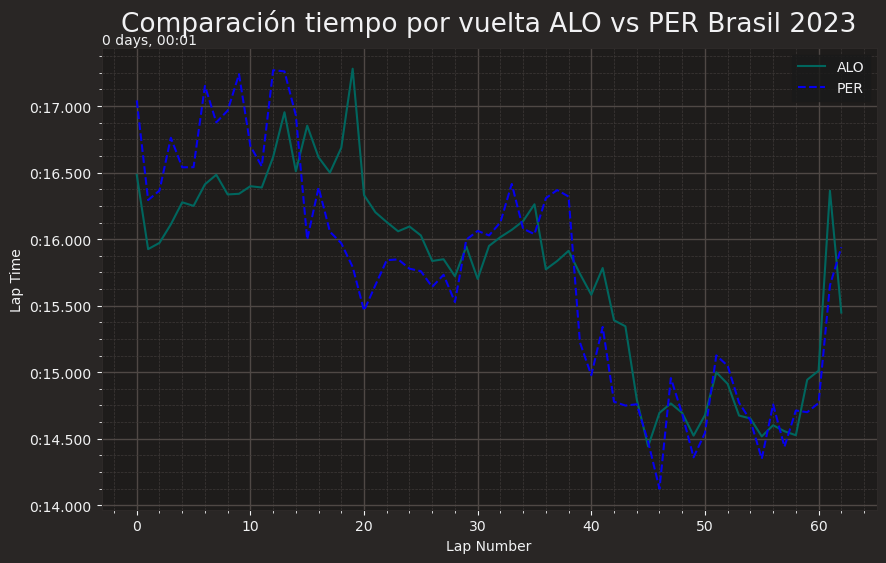

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))

for driver in ('ALO', 'PER'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.set_title("Comparación tiempo por vuelta ALO vs PER Brasil 2023")
ax.legend()

#### Comparación de la vuelta más rápida de Alonso y Checo

In [61]:
session.laps.pick_drivers('ALO').pick_quicklaps().max().reset_index()


,index,0
0,Time,0 days 02:59:46.145000
1,Driver,ALO
2,DriverNumber,14
3,LapTime,0 days 00:01:17.281000
4,LapNumber,71.0
5,Stint,5.0
6,PitOutTime,NaT
7,PitInTime,NaT
8,Sector1Time,0 days 00:00:19.926000
9,Sector2Time,0 days 00:00:39.899000


In [62]:
session.laps.pick_drivers('PER').pick_quicklaps().max().reset_index()

,index,0
0,Time,0 days 02:59:46.198000
1,Driver,PER
2,DriverNumber,11
3,LapTime,0 days 00:01:17.270000
4,LapNumber,71.0
5,Stint,5.0
6,PitOutTime,NaT
7,PitInTime,NaT
8,Sector1Time,0 days 00:00:19.961000
9,Sector2Time,0 days 00:00:39.801000


#### Comparación de los tres sectores a lo largo de la carrera de ambos pilotos

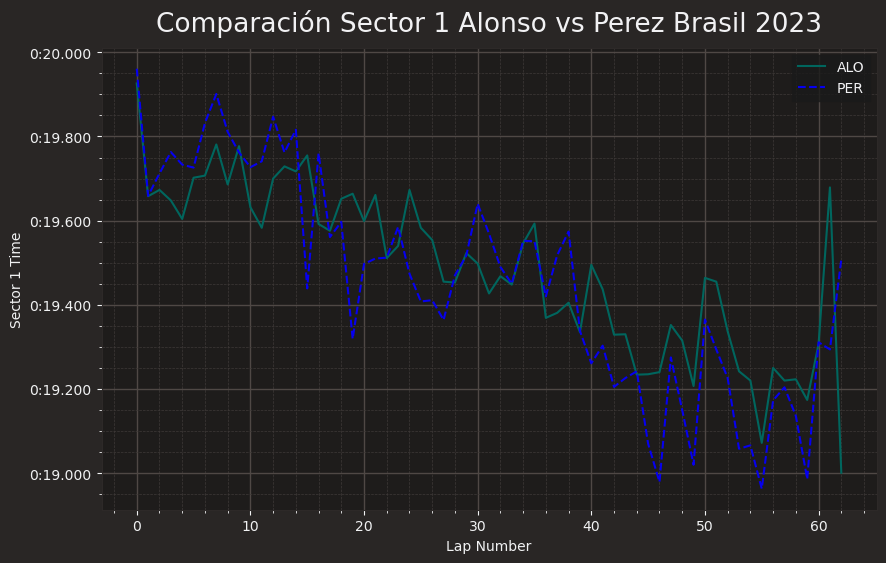

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))

for driver in ('ALO', 'PER'):
    laps = session.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=session)
    ax.plot(laps['Sector1Time'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Sector 1 Time")
ax.set_title("Comparación Sector 1 Alonso vs Perez Brasil 2023")
ax.legend()

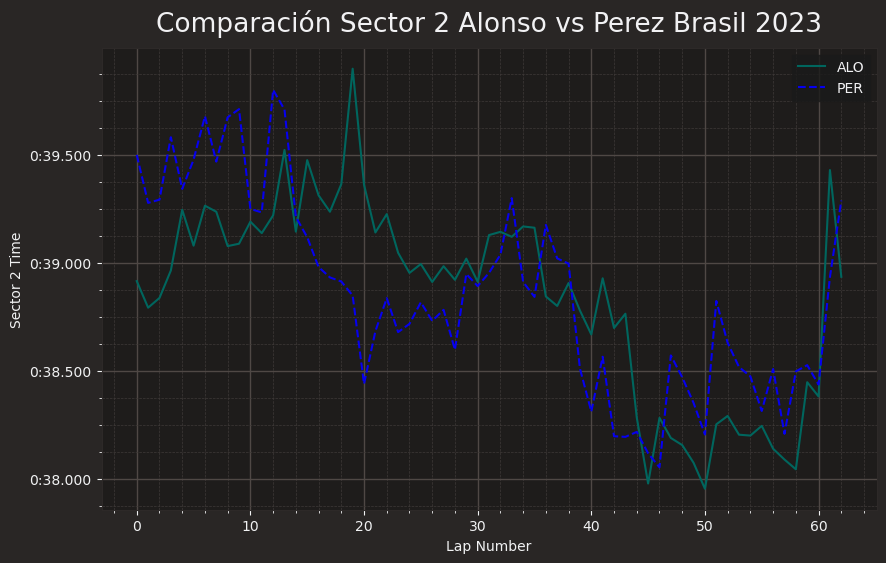

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

for driver in ('ALO', 'PER'):
    laps = session.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=session)
    ax.plot(laps['Sector2Time'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Sector 2 Time")
ax.set_title("Comparación Sector 2 Alonso vs Perez Brasil 2023")
ax.legend()

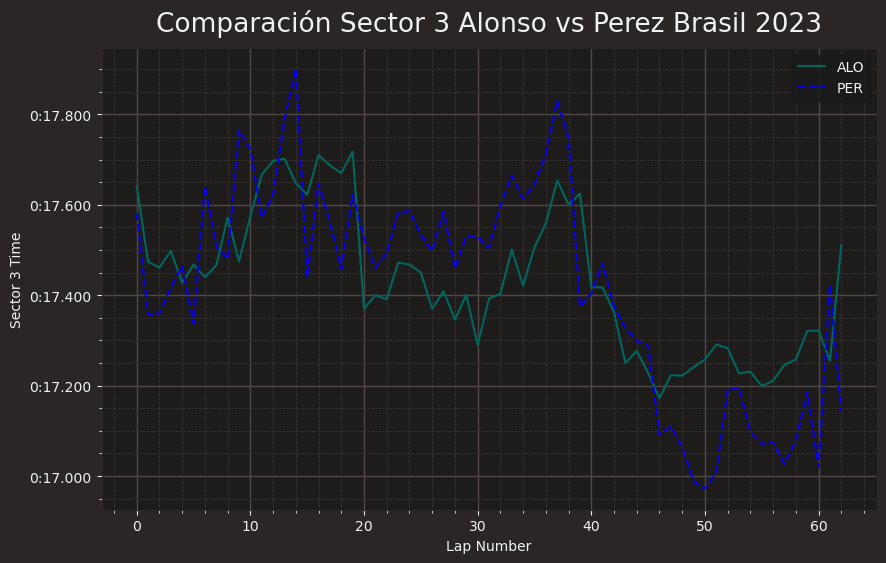

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))

for driver in ('ALO', 'PER'):
    laps = session.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=session)
    ax.plot(laps['Sector3Time'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Sector 3 Time")
ax.set_title("Comparación Sector 3 Alonso vs Perez Brasil 2023")
ax.legend()

#### Comparación de los stints hechos

In [71]:
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"]for driver in drivers]

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver","Stint","Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})

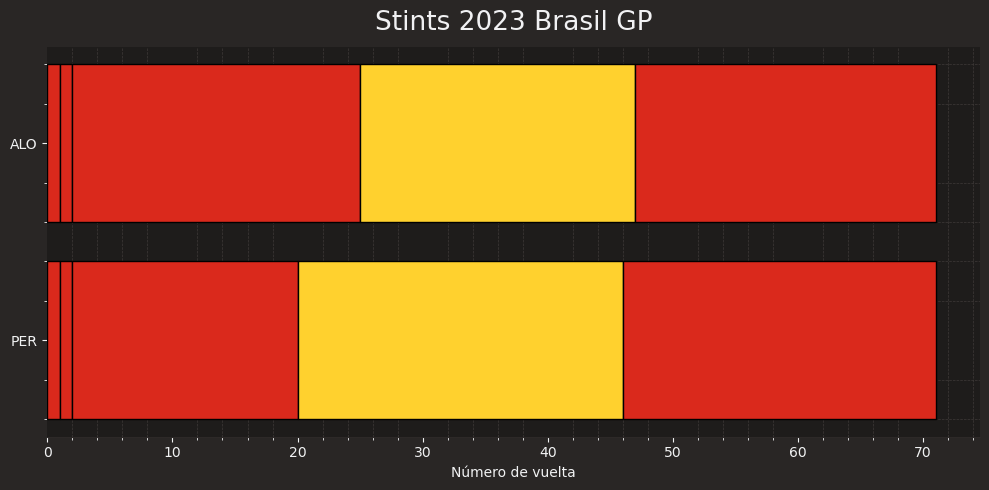

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))

for driver in ("ALO","PER"):
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]
        
plt.title("Stints 2023 Brasil GP")
plt.xlabel("Número de vuelta")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

#### Posición vuelta a vuelta de ambos pilotos
Las caídas hacen referencia a las paradas en boxes

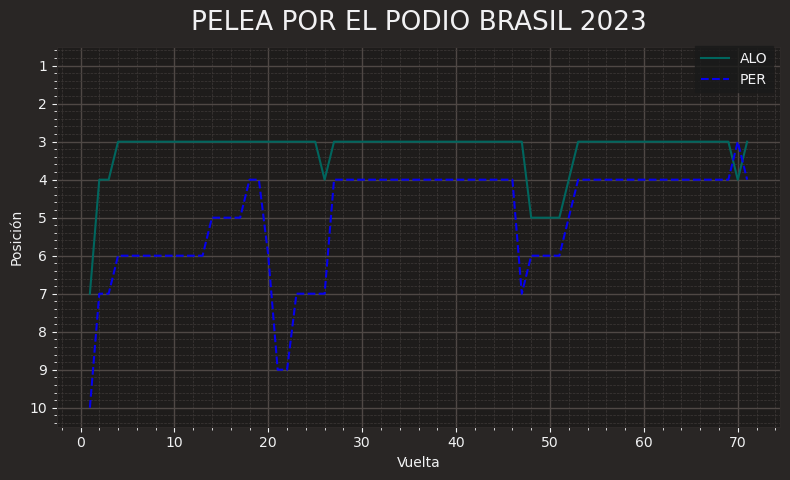

In [70]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in ("ALO","PER"):
    drv_laps = session.laps.pick_drivers(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=session)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)

ax.set_ylim([10.5, 0.5])
ax.set_yticks([1,2,3,4,5,6,7,8,9, 10])
ax.set_xlabel('Vuelta')
ax.set_ylabel('Posición')
ax.set_title("PELEA POR EL PODIO BRASIL 2023")

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()